In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [17]:
# def euclidean_distance(x1, x2):
#     x1 = np.array(x1)
#     x2 = np.array(x2)
    
#     # Calculate the Euclidean distance
#     distance = np.sqrt(np.sum((x1 - x2)**2))
#     return distance

# class KNN:
#     def __init__(self,k=3):
#         self.k = k
        
#     def fit(self,X,y):
#         self.X_train = X
#         self.y_train = y
    
#     def predict(self,X):
#         return [self._predict(x) for x in X]
    
#     def _predict(self,x):
#         return Counter([self.y_train[i] for i in np.argsort([euclidian_dist(x,x_train) for x_train in self.X_train])[:self.k]]).most_common()


import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

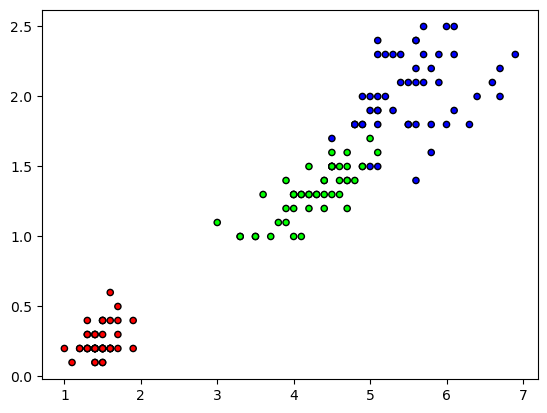

96.66666666666667


In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print(predictions)
acc = np.sum(predictions == y_test) / len(y_test)
print(acc*100)

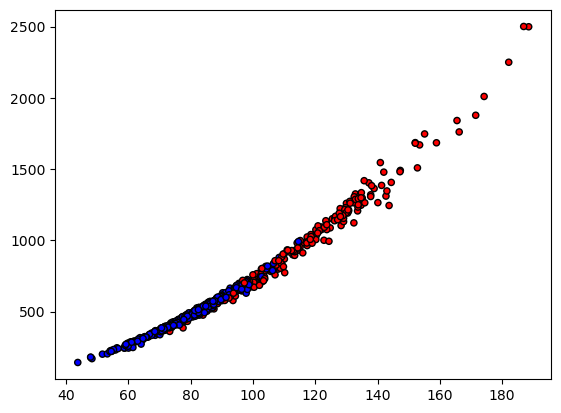

92.98245614035088


In [24]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X_bc[:,2],X_bc[:,3], c=y_bc, cmap=cmap, edgecolor='k', s=20)
plt.show()

clf = KNN(k=5)
clf.fit(X_bc_train, y_bc_train)

predictions = clf.predict(X_bc_test)

accuracy = np.sum(predictions == y_bc_test) / len(y_bc_test)
print( accuracy * 100)
